# Исследование объявлений о продаже квартир

**Цель исследования** - используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир, которые влияют на стоимость недвижимости в Санкт-Петербурге и соседних населенных пунктах.

Требуется:

- Изучить время необходимое для продажи квартиры;
- Выявить какие факторы больше всего влияют на стоимость квартиры?
    - Изучить, зависит ли цена от площади, числа комнат,удалённости от центра;
    - Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом;
    - Изучить зависимость от даты размещения: дня недели, месяца и года;
    
- Выбрать 10 населённых пунктов с наибольшим числом объявлений.
    - Посчитать среднюю цену квадратного метра в этих населённых пунктах;
    - Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
    
**Ход исследования** - информацию о продаже квартир в Санкт-Петербурге и соседних населенных пунктах мы получим из архива объявлений за несколько лет, часть параметров таблицы получена путем автоматического заполнения на основе картографических данных. О качестве данных ничего не известно, поэтому перед началом исследования следует провести обзор данных на предмет ошибок и их влияния на результат исследования. Затем, на этапе предобработки следует скорректировать ошибки, которые являются критическими. Далее провести анализ показателей, требующихся для исследования, расчитать недостающие и добавить их в общую таблицу. 

**Описание данных:**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 - число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Проверка-допустимых-значений-и-удаление-дубликатов." data-toc-modified-id="Проверка-допустимых-значений-и-удаление-дубликатов.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка допустимых значений и удаление дубликатов.</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла
<a id=general_id></a>

In [1]:
import pandas as pd
from pymystem3 import Mystem
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russian')
pd.set_option('display.float_format', '{:,.2f}'.format)
import seaborn as sns


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


Итак, таблица с информацией об объявлениях о продаже недвижимости содержит 23 699 строк,22 колонки и 4 типа данных.
Согласно документации к данным:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000
* ponds_nearest - число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* studio — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

В таблице `выделены` показатели,которые потребуются для расчета и анализа.


### Вывод

При изучении таблицы выявлены нарушения в наименованиях колонок
* `cityCenters_nearest`;
* `parks_around3000`;
* `ponds_around3000`

Есть следущие замечания к данным из исходной таблицы:

1. Выявлены пропуски в следующих значенияx;
* `ceiling_height`
* `floors_total`
* `living_area`
* `is_apartment`
* `kitchen_area`
* `balcony`
* `locality_name`
* `airports_nearest`
* `cityCenters_nearest`
* `parks_around3000`
* `parks_nearest`
* `ponds_around3000`
* `ponds_nearest`
* `days_exposition`

2. Требуется изменить тип данных для столбцов:
* `last_price`, `floors_total `, `floor`, `airports_nearest`, `cityCenters_nearest`,`parks_around3000`,	`parks_nearest`, `ponds_around3000`,`ponds_nearest`,`days_exposition`,`balcony` - c float на int
* `is_apartment` - с object на bool


В исходной таблице представлена информация о стоимости продаваемых квартир в в Санкт-Петербурге и соседних населённых пунктах за несколько лет и их параметрах по (площади, высоте потолков, этаже, районе,  времени продажи и прочих картографических данных. Согласно цели исследования нам потребуются не все пераметры таблицы. Предварительно можно утверждать,что данных для проведения анализа достаточно.Но перед началом исследования требуется выполнить предобработку данных, исключить нулевые значения, проверить таблицу на наличие дубликатов, изменить типы данных, выполнить категоризации и только после этого провести исследование.


## Предобработка данных

### Переименование столбцов
<a id="preprocessing_one_id"></a>

Приведем в порядок наименование используемых столбцов таблицы и выведем результат на экран.

In [3]:

data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'})
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**

Для приведения данных к единообразию были изменены наименования столбцов:
- cityCenters_nearest;
- parks_around3000;
- ponds_around3000


### Обработка пропусков
<a id="preprocessing_two_id"></a>

Приступим к предобработке нулевых значений.

Выведем минимальное, максимальное, среднее значения и значение медианы по высоте потолка.


In [4]:
data['ceiling_height'].describe()


count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Сделав несколько запросов в поисковике Яндекса, получим информацию о возможной высоте потолков.
1. По нормам минимальная высота потолков: на кухне и в жилых комнатах - не менее 2,5-2,7 метра, в зависимости от климатического района.
2. Максимальная высота потолков отмечена в сталинских высотках, она достигает 5 метров, если предположить,что квартира может быть двухуровневая, то высота потолка не может превышать 10 метров.

Все нулевые значения, значения ниже или выше нормативных изменим на значение медианы (так как на среднюю оказывают значения анамально высокие значения потолков).
Выведем минимальное, максимальное, среднее значения и значение медианы на экран и информацию о таблице после изменений.




In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
for el in data['ceiling_height']:
    if el <=0:
        data['ceiling_height'] = data['ceiling_height'].replace(el,data['ceiling_height'].median())
       

In [6]:
def emissions(data, field):
    #функция для отбора выбросов с помощью межквартильного размаха
    before_size = len(data[field])
    q1, q3 = data[field].quantile(0.25), data[field].quantile(0.75)
    iqr = q3-q1
    data = data.query(f'@q1 - 1.5*@iqr < {field} and @q3 + 1.5*@iqr > {field}')
    after_size = len(data[field])
    percent_part = (before_size - after_size)/before_size
    print(q1-1.5*iqr,q3+1.5*iqr)
    print(f'Удалено выбросов: {before_size - after_size} ({percent_part:.1%})')

In [7]:
emissions(data, 'ceiling_height')

2.45 2.8500000000000005
Удалено выбросов: 2972 (12.5%)


Выведем минимальное, максимальное, среднее значения и значение медианы по количеству этажей.
А также какой % полей не заполнен.


In [8]:
print("Миниальное количество этажей:",data['floors_total'].min())
print("Максимальное количество этажей:",data['floors_total'].max())
print("Медиана по количеству этажей:",data['floors_total'].median())
print("Среднее по количеству этажей:",data['floors_total'].mean())
data['floors_total'].isna().mean()


Миниальное количество этажей: 1.0
Максимальное количество этажей: 60.0
Медиана по количеству этажей: 9.0
Среднее по количеству этажей: 10.67382374115953


0.0036288450989493226

Число пропусков не более 0,36% от общего количества строк, пропущенные значения можно смело удалить.

In [9]:
data.dropna(subset=['floors_total'],inplace=True)

data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               12133 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Найдем количество пропусков по показателю жилой площади.

In [10]:
print(data['living_area'].isna().sum()/23699*100)

7.890628296552597


8% это немалая часть квартир, найдем соотношение жилой и общей площади, а также отношение площади кухни к общей площади для всех позиций и добавим столбцы с новыми показателями. По недостающим строкам подставим эти пропорции и найдем недостающие данные по жилой площади и площади кухни.

In [79]:
data['part_of_living_area'] = data['living_area']/data['total_area']
data['part_of_kitchen_area'] = data['kitchen_area']/data['total_area']

total_area_unique = data['total_area'].unique()

for i in total_area_unique:
    el_liv = data.loc[data['total_area']==i,'part_of_living_area']
    el_liv_median = el_liv.median()
    data['living_area']=data['living_area'].fillna(data['total_area']*el_liv_median)
    el_kit = data.loc[data['total_area']==i,'part_of_kitchen_area']
    el_kit_median = el_kit.median()
    data['kitchen_area']=data['kitchen_area'].fillna(data['total_area']*el_kit_median)


print(data.pivot_table(index='total_area',values=['part_of_living_area','part_of_kitchen_area']))
data.info()



            part_of_kitchen_area  part_of_living_area
total_area                                           
12.00                       0.13                 0.83
13.00                       0.13                 0.63
13.20                       0.13                 0.57
14.00                       0.14                 0.79
15.00                       0.13                 0.57
...                          ...                  ...
590.00                      0.17                 0.69
618.00                      0.11                 0.42
631.00                      0.10                 0.57
631.20                      0.03                 0.51
900.00                      0.12                 0.46

[2159 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23558 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23558 non-null  int32

Возможно при заполнении объявления, собственник квартиры пропустил ячейку с населенным пунктом.
Пропущенных значений по местонахождению немного и возможно их заменить на 0, но так как у нас есть данные об удаленности от центра, часть пропущенных значений можно с легкостью заменить.
Проверим заполнена ли информация об удаленности от центра в строках, где отсутствует местонахождение.

In [12]:
print(data[data['locality_name'].isna()]['city_centers_nearest'].count()/len(data)*100)
print(data[data['locality_name'].isna()]['city_centers_nearest'])

0.16939821284885442
1097     4,258.00
2033          NaN
2603    17,369.00
2632    17,369.00
3574     8,127.00
4151     3,902.00
4189     3,039.00
4670     5,382.00
5343     9,538.00
5707    16,788.00
6765    17,369.00
7114     8,582.00
7330     4,627.00
7600    12,332.00
8568     4,065.00
9821     3,801.00
10122    4,474.00
11248    4,069.00
12879   12,332.00
12936    4,383.00
13223   17,369.00
13690   23,659.00
14273   17,369.00
14342         NaN
15686    9,633.00
15866    9,497.00
16499   17,369.00
16561    8,619.00
16610    1,322.00
17535         NaN
17764   10,976.00
18526    8,943.00
18917    8,429.00
19045    3,312.00
19972   17,369.00
20057    4,258.00
20382         NaN
20590         NaN
20654    4,604.00
21119   31,897.00
21276   41,294.00
21333    4,805.00
21715         NaN
21898         NaN
22474    1,780.00
22717         NaN
22933   17,369.00
23214    8,943.00
Name: city_centers_nearest, dtype: float64


Большинство колонок заполнено, проверим минимальную удаленность от центра в г. Санкт-Петербург.

In [13]:

data.pivot_table(index='locality_name',values=['city_centers_nearest'], aggfunc={'city_centers_nearest':'min'}).sort_values(by='city_centers_nearest')

,city_centers_nearest
locality_name,
Санкт-Петербург,181.00
посёлок Шушары,"17,012.00"
посёлок Парголово,"17,994.00"
посёлок Стрельна,"21,813.00"
Пушкин,"24,311.00"
посёлок Левашово,"25,727.00"
посёлок Песочный,"25,867.00"
посёлок Лисий Нос,"26,368.00"
посёлок Металлострой,"26,696.00"


Минимальная удаленность от г. Санкт-Петербурга у поселка Шушары, поэтому мы можем утверждать,что все объявления с удаленностью менее 17012 м - это Санкт-Петербург. Заменим их, а для остальных укажем 0.

In [80]:
data.query("city_centers_nearest < 17012").fillna('Санкт-Петербург', inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23558 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23558 non-null  int32         
 1   last_price            23558 non-null  int32         
 2   total_area            23558 non-null  float32       
 3   first_day_exposition  23558 non-null  datetime64[ns]
 4   rooms                 23558 non-null  int32         
 5   ceiling_height        23558 non-null  float32       
 6   floors_total          23558 non-null  int32         
 7   living_area           23558 non-null  float32       
 8   floor                 23558 non-null  int32         
 9   is_apartment          2760 non-null   object        
 10  studio                23558 non-null  bool          
 11  open_plan             23558 non-null  bool          
 12  kitchen_area          23558 non-null  float32       
 13  balcony         

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [15]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,part_of_living_area,part_of_kitchen_area
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,NaN,...,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,NaN,...,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14.00,90.10,9,NaN,...,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,NaN,NaN
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.32,0.41


Заменим пропущенные значения в колонке city_centers_nearest на 0.

In [16]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0) 

**Вывод**


В таблице были выявлены пропущенные значения в столбцах:
1. Высота потолков.
Пропущенные значения по показателю высоты потолков было решено изменить на значение медианы.
Но перед тем как определить значение медианы требуется исправить аномально низкие показатели высоты потолков и аномально высокие на минимальное значение 2,5 метра и максимальное значение в 10 метров.

2. Количество этажей.
В 0,36% случаях не указано количество этажей. Так как количество пропущенных значений не значительно, было принято решение заменить их на значение медианы.

3. Жилая площадь.
По всем позициям указана общая площадь жилья, но в 8% присутствуют пропуски по показателю жилой площади.
Для заполнения пропусков был добавлен показатель соотношение жилой площади к общей площади жилья и соотношение площади кухни к общей площади жилья. Исходя из добавленных пропорций мы определили жилую площадь и площадь кухни применив рассчитанный процент к общей площади жилья.

4. Населенный пункт.
Часть пропущенных значений по параметру населенный пункт определить не представляется возможным, но часть пропущенных значений заполенены исходя из показателя удаленности от центра.

5. Удаленность от центра.
Часть пропущенных значений были заменены на 0.


### Замена типа данных
<a id="preprocessing_three_id"></a>

In [17]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               12133 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Заменим тип данных по столбцам,которые будут участвовать в исследовании. 
last_price, floors_total, days_exposition изменим с float на int, так как в данных показателях используются целые значения.
В колонке first_day_exposition отображается дата размещения, поэтому в ней укажем формат даты.
И на последок оптимизируем хранение данных и изменим на тип данных на тот тип, который занимает меньше места.

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['last_price'] = data['last_price'].astype('int32')
data['floors_total'] = data['floors_total'].astype('int32')


for dtype in ['int']:
    selected_dtype = data.select_dtypes(include=[dtype])
    selected_dtype_column = selected_dtype.columns
    for i in selected_dtype_column:
        data[i] = data[i].astype('int32')

for dtype in ['float']:
    selected_dtype = data.select_dtypes(include=[dtype])
    selected_dtype_column = selected_dtype.columns
    for i in selected_dtype_column:
        data[i] = data[i].astype('float32')

data.info(memory_usage='deep')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int32         
 1   last_price            23613 non-null  int32         
 2   total_area            23613 non-null  float32       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int32         
 5   ceiling_height        23613 non-null  float32       
 6   floors_total          23613 non-null  int32         
 7   living_area           23613 non-null  float32       
 8   floor                 23613 non-null  int32         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float32       
 13  balcony         

**Вывод**

Для того,чтобы было легче производить анализ мы избавились от ненужных нулей и запятых,изменив тип данных с float на int. Далее был установлен формат даты для колонки с датой размещения объявления и сократили объем потребляемой памяти изменив тип данных с 64 на 32.

### Проверка допустимых значений и удаление дубликатов.
<a id="preprocessing_four_id"></a>

Проверим допустимые значения и изучим значения для столбцов:

In [19]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,part_of_living_area,part_of_kitchen_area
count,"23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","23,613.00","12,133.00","18,081.00","23,613.00","18,105.00","8,045.00","18,105.00","9,061.00","20,441.00","21,743.00","21,382.00"
mean,9.87,"6,540,555.46",60.34,2.07,2.72,10.67,34.58,5.88,10.26,1.15,"28,788.01","10,875.65",0.61,490.55,0.77,518.21,180.88,0.56,0.19
std,5.68,"10,901,722.74",35.65,1.08,0.99,6.60,22.35,4.87,5.93,1.07,"12,626.21","9,637.66",0.80,341.34,0.94,277.89,219.69,0.11,0.07
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,0.00,0.00,1.00,0.00,13.00,1.00,0.02,0.03
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,"18,575.00","2,210.00",0.00,288.00,0.00,294.00,45.00,0.50,0.13
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,1.00,"26,726.00","11,240.00",0.00,455.00,1.00,503.00,95.00,0.57,0.17
75%,14.00,"6,799,000.00",69.80,3.00,2.70,16.00,42.10,8.00,11.70,2.00,"37,242.00","15,237.00",1.00,612.00,1.00,730.00,232.00,0.64,0.23
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00",1.00,0.79


count   23,613.00
mean        60.34
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.80
max        900.00
Name: total_area, dtype: float64

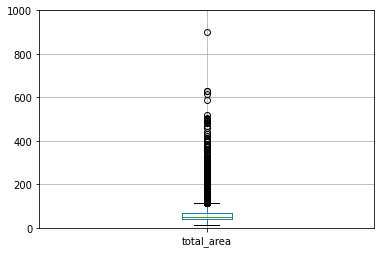

In [20]:
data.boxplot(column='total_area')
plt.ylim(0, 1000)
data['total_area'].describe()

(0.0, 20.0)

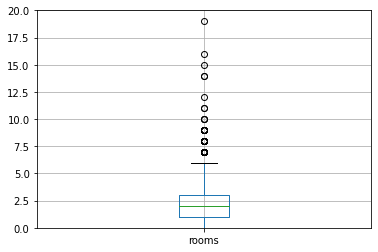

In [21]:
data.boxplot(column='rooms')
plt.ylim(0, 20)


count   23,613.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

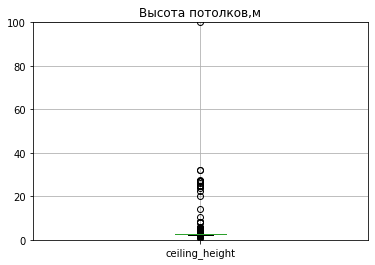

In [22]:
data.boxplot(column='ceiling_height')
plt.ylim(0, 100)
plt.title("Высота потолков,м")
data['ceiling_height'].describe()

count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

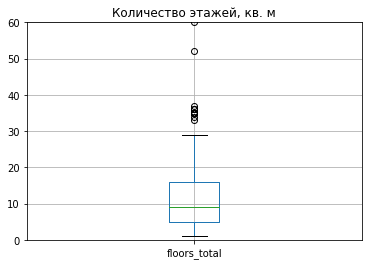

In [23]:
data.boxplot(column='floors_total')
plt.ylim(0, 60)
plt.title("Количество этажей, кв. м")
data['floors_total'].describe()

count   23,613.00
mean        34.58
std         22.35
min          2.00
25%         19.00
50%         30.00
75%         42.10
max        409.70
Name: living_area, dtype: float64

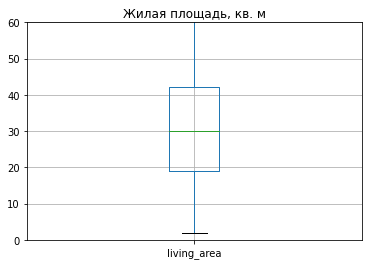

In [24]:
data.boxplot(column='living_area')
plt.ylim(0, 60)
plt.title("Жилая площадь, кв. м")
data['living_area'].describe()


count   23,613.00
mean        10.26
std          5.93
min          1.30
25%          7.00
50%          9.00
75%         11.70
max        112.00
Name: kitchen_area, dtype: float64

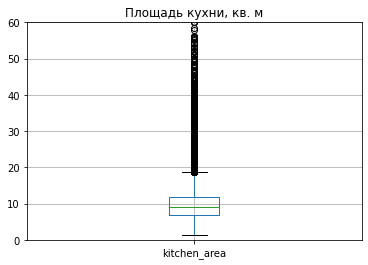

In [25]:
data.boxplot(column='kitchen_area')
plt.ylim(0, 60)
plt.title("Площадь кухни, кв. м")
data['kitchen_area'].describe()

count   23,613.00
mean         5.88
std          4.87
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

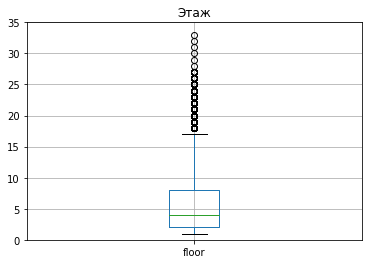

In [26]:
data.boxplot(column='floor')
plt.ylim(0, 35)
plt.title("Этаж")
data['floor'].describe()

count   23,613.00
mean    10,875.65
std      9,637.66
min          0.00
25%      2,210.00
50%     11,240.00
75%     15,237.00
max     65,968.00
Name: city_centers_nearest, dtype: float64

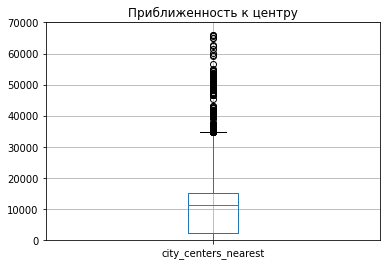

In [27]:
data.boxplot(column='city_centers_nearest')
plt.ylim(0, 70000)
plt.title("Приближенность к центру")
data['city_centers_nearest'].describe()


count   20,441.00
mean       180.88
std        219.69
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

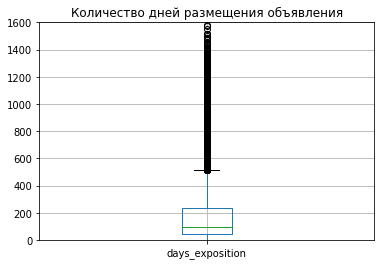

In [28]:
data.boxplot(column='days_exposition')
plt.ylim(0, 1600)
plt.title("Количество дней размещения объявления")
data['days_exposition'].describe()


In [29]:
data['locality_name'].describe(include='o')

count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

При изучении уникальный значений были выявлены ошибки по столбцам:
- rooms (указано 0 количество комнат)
- locality_name (заменить ё на е, привести буквы к нижнему регистру, привести к единобразию наименования населенных пунктов)
- living_area (указана жилая площадь до 5,5 кв м)
- kitchen_area (указана площадь кухни в 1.3 кв м)

Для того,чтобы понять можем ли мы отнести все квартиры с 0 количеством комнат к однокомнатным, проверим максимальную площадь квартиры в зависимости от количества комант.

In [31]:
data.pivot_table(index='rooms',values='total_area', aggfunc={'total_area':'max'})

,total_area
rooms,
0,371.00
1,494.10
2,196.00
3,363.10
4,500.00
5,507.00
6,500.00
7,631.20
8,373.10


Площадь квартир с 0 значением в категории "количество" комнат не превышает площадь однокомнатных квартир, поэтому предположим,что все квартиры с категорией 0 - однокомнатные, заменим 0 значения.

In [32]:
data['rooms']=data['rooms'].replace(0,1)

print(data['rooms'].unique())

[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16 12]


Определим количество пропусков в столбце locality_name.

In [33]:
data['locality_name'].isna().sum()/len(data)

0.002032778554186253

Удалим все пропуски в столбце locality_name

In [34]:
data.dropna(subset=['locality_name'], inplace=True)

Заменим все буквы ё на е и приведем все значения locality_name к нижнему регистру.

In [35]:

data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.lower()

print(data['locality_name'].unique())
data['locality_name'].describe()

['санкт-петербург' 'поселок шушары' 'городской поселок янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'поселок городского типа лебяжье'
 'поселок городского типа сиверский' 'поселок молодцово'
 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок городского типа ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня оржицы' 'деревня кальтино'

count               23565
unique                330
top       санкт-петербург
freq                15651
Name: locality_name, dtype: object

В назаваниях задвоены названия "поселок городского типа" и "городской поселок" и "садоводческое некоммерческое товарищество',"садовое товарищество". Заменим "городской поселок" на "поселок городского типа" и "садоводческое некоммерческое товарищество" на "садовое товарищество".

In [36]:
russian_stemmer = SnowballStemmer('russian')

for el in data['locality_name']:
    print(el)
    stemmed_query = russian_stemmer.stem(el)
    
    for word in stemmed_query.split(' '):
            if  word=='городской' or word=='типа' :
                data['locality_name']=data['locality_name'].str.replace('городской поселок','поселок городского типа')
            if word=='садоводческое некоммерческое товарищество':
                data['locality_name']=data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')
print(data['locality_name'].unique())

санкт-петербург
поселок шушары
санкт-петербург
санкт-петербург
санкт-петербург
городской поселок янино-1
поселок парголово
санкт-петербург
поселок мурино
санкт-петербург
санкт-петербург
ломоносов
сертолово
петергоф
пушкин
санкт-петербург
санкт-петербург
санкт-петербург
санкт-петербург
санкт-петербург
поселок парголово
санкт-петербург
деревня кудрово
санкт-петербург
санкт-петербург
санкт-петербург
санкт-петербург
санкт-петербург
пушкин
санкт-петербург
коммунар
санкт-петербург
санкт-петербург
колпино
санкт-петербург
санкт-петербург
санкт-петербург
поселок городского типа красный бор
поселок мурино
санкт-петербург
поселок парголово
санкт-петербург
петергоф
санкт-петербург
санкт-петербург
санкт-петербург
санкт-петербург
гатчина
санкт-петербург
санкт-петербург
пушкин
санкт-петербург
санкт-петербург
поселок парголово
санкт-петербург
санкт-петербург
санкт-петербург
поселок шушары
санкт-петербург
санкт-петербург
поселок мурино
санкт-петербург
сертолово
санкт-петербург
гатчина
санкт-петербург
п

Посмотрим строки, где указана жилая площадь в 2 кв метра.


In [37]:

display(data.query('living_area <= 5.5'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,part_of_living_area,part_of_kitchen_area
3242,7,4440000,41.00,2017-07-02,1,2.65,17,3.00,17,NaN,...,санкт-петербург,"19,272.00","13,073.00",0.00,NaN,0.00,NaN,216.00,0.07,0.27
13915,20,6350000,52.00,2018-02-06,2,3.00,6,2.00,2,NaN,...,санкт-петербург,"32,453.00","6,521.00",0.00,NaN,1.00,"1,012.00",91.00,0.04,0.17
17582,11,2680000,22.00,2018-08-11,1,2.65,25,5.00,8,NaN,...,санкт-петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,70.00,0.23,NaN
21758,0,2330000,23.00,2018-01-01,1,2.65,24,2.00,22,NaN,...,поселок мурино,NaN,0.00,NaN,NaN,NaN,NaN,66.00,0.09,NaN
21943,15,6100000,77.60,2019-02-28,4,2.50,9,5.40,1,NaN,...,санкт-петербург,"29,338.00","11,270.00",1.00,584.00,0.00,NaN,33.00,0.07,0.13
23574,14,64990000,139.00,2015-11-24,3,3.00,8,3.00,8,NaN,...,санкт-петербург,"33,255.00","5,975.00",1.00,630.00,3.00,100.00,280.00,0.02,0.12


По жилой площади явно есть строки с выбросами. Удалим их.

In [38]:
data=data.query('living_area >5.5')

Проверим нижний порог.

count   23,559.00
mean        34.58
std         22.35
min          6.00
25%         19.00
50%         30.00
75%         42.10
max        409.70
Name: living_area, dtype: float64

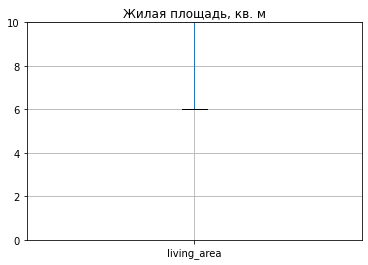

In [39]:
data.boxplot(column='living_area')
plt.ylim(0, 10)
plt.title("Жилая площадь, кв. м")
data['living_area'].describe()


Проверим площадь кухни

In [40]:

display(data.query('kitchen_area <= 1.3'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,part_of_living_area,part_of_kitchen_area
20217,7,4250000,28.50,2019-05-01,1,2.80,14,19.50,10,NaN,...,санкт-петербург,"37,199.00","12,721.00",0.00,NaN,0.00,NaN,NaN,0.68,0.05


Удалим строки,где аномально низкие значения площади кухни.

In [41]:
data=data.query('kitchen_area >1.3')

count   23,558.00
mean        10.26
std          5.93
min          1.57
25%          7.00
50%          9.00
75%         11.70
max        112.00
Name: kitchen_area, dtype: float64

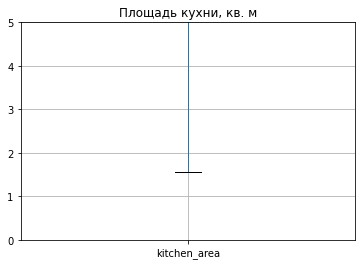

In [42]:
data.boxplot(column='kitchen_area')
plt.ylim(0, 5)
plt.title("Площадь кухни, кв. м")
data['kitchen_area'].describe()

Изучим минимальные и максимальные значения таких параметров как: удаленность от центра, стоимость квартиры, общая площадь жилья, сгруппировав таблицу по количеству комнат.

In [43]:
print(data.pivot_table(index='rooms',values=['total_area','city_centers_nearest','last_price'], aggfunc={'min','max'}))

      city_centers_nearest          last_price            total_area       
                       max      min        max        min        max    min
rooms                                                                      
1                60,223.00     0.00   71000000     430000     494.10  12.00
2                65,968.00     0.00  289238400      12190     196.00  20.00
3                65,764.00     0.00  330000000     550000     363.10  40.10
4                54,646.00     0.00  159984000     999000     500.00  42.00
5                52,895.00     0.00  401300000    1650000     507.00  40.00
6                34,251.00     0.00  245000000    4390000     500.00  87.00
7                27,749.00     0.00  763000000    7900000     631.20 100.60
8                34,132.00 1,152.00  180000000   15800000     373.10 150.00
9                16,722.00 2,725.00   88000000   17000000     400.00 235.00
10               12,169.00 4,921.00   40000000   15500000     290.00 216.10
11          

Стоимость квартир до 500 000 руб. выглядит странной, проверим в каких населенных пунктах расположены эти квартиры.

In [44]:
print(data.query('last_price < 500000')['locality_name'])

5698     поселок городского типа будогощь
6859                   деревня старополье
8793                      санкт-петербург
9581                   деревня старополье
10782                              сланцы
14911               поселок станции свирь
16032                              сланцы
16219                деревня вахнова кара
16274                  деревня старополье
17456                              сланцы
17676                   деревня ям-тесово
18867                    деревня выскатка
21912                   поселок совхозный
23484                              сланцы
Name: locality_name, dtype: object


Возможно,что стоимость квартиры в деревне ниже 500 000 руб., но для Санкт-Петербурга не характерна столь низкая стоимость жилья.
Проверим строку 8793

In [45]:
print(data.loc[8793:8793])

      total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12190      109.00           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
8793            2.75            25        32.00     25          NaN  ...   

        locality_name  airports_nearest  city_centers_nearest  \
8793  санкт-петербург         36,421.00              9,176.00   

      parks_around_3000 parks_nearest  ponds_around_3000  ponds_nearest  \
8793               1.00        805.00               0.00            NaN   

      days_exposition  part_of_living_area  part_of_kitchen_area  
8793             8.00                 0.29                  0.37  

[1 rows x 24 columns]


Есть практика продажи квартир с обременением ниже рыночной стоимости. Даже если на квартиру наложено обременение, 12 000 руб. слишком низкая стоимость. Выведем среднюю стоимость двухкомнатной квартиры в Санкт-Петербруге.

In [46]:
print(data.query('rooms == 2 |  locality_name == "санкт-петербург"')['last_price'].mean())

7362107.50460455


Средняя стоимость двухкомнатной квартиры в Санкт-Петербурге 7 миллионов рублей, возможно при вводе собственник квартиры указал сумму в тысячах рублей, исправим значение на 12 190 000 руб.

In [47]:
data.loc[8793:8793]=data.loc[8793:8793].replace(12190,12190000)
print(data.loc[8793:8793])

      total_images  last_price  total_area first_day_exposition  rooms  \
8793             7    12190000      109.00           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
8793            2.75            25        32.00     25          NaN  ...   

        locality_name  airports_nearest  city_centers_nearest  \
8793  санкт-петербург         36,421.00              9,176.00   

      parks_around_3000 parks_nearest  ponds_around_3000  ponds_nearest  \
8793               1.00        805.00               0.00            NaN   

      days_exposition  part_of_living_area  part_of_kitchen_area  
8793             8.00                 0.29                  0.37  

[1 rows x 24 columns]


Проверим количество дубликатов в таблице

In [48]:
data.duplicated().sum()

0

Дубликатов при проверке не обнаружено.

**Вывод**

При проверке допустимых значений были внесены корректировки:

1. Количество комнат.
Все 0 значения по количеству комнат были заменены на однокомнатные. Так как площадь позиций с нулевым значением количества комнат не превышает площадь, указанную в однокомнатных квартирах.

2. Названия населенных пунктов.
Названия населенных пунктов были приведены к нижнему регистру и были заменены буквы ё на е.
Были заменены названия "городской поселок" на "поселок городского типа" и "садоводческое некоммерческое товарищество" на "садовое товарищество".

3. Стоимость жилья.
По строке 8793 была указана аномально низкая стоимость жилья.
Можно предположить,что при публикации объявления стоимость была указана в тысячах рублей.
Было принято решение изменить стоимость жилья с 12190 на 12190000.

4. Жилая площадь и площадь кухни.
Были удалены значения в пределах выбросов.


### Расчёты и добавление результатов в таблицу
<a id="preprocessing_five_id"></a>

Для проведения анализа требуется рассчитать такие показатели как:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


Добавим столбец с ценой квадратного метра в таблицу и выведем максимальное и минимальное значение.

In [49]:
data['price'] = data['last_price']/data['total_area']
print(data.query('price == price.min()').pivot_table(index='rooms', columns=['locality_name'], values=['price']))
print(data.query('price == price.max()').pivot_table(index='rooms', columns=['locality_name'], values=['price']))

                              price
locality_name поселок станции свирь
rooms                              
2                          7,962.96
                        price
locality_name санкт-петербург
rooms                        
7                1,907,500.00


Определим день недели, месяц и год для колонки first_day_exposition

In [50]:
data['category_year']=data['first_day_exposition'].dt.year
data['category_month']=data['first_day_exposition'].dt.month
data['category_weekday']=data['first_day_exposition'].dt.weekday

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,part_of_living_area,part_of_kitchen_area,price,category_year,category_month,category_weekday
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,482.00,2.00,755.00,NaN,0.47,0.23,"120,370.37",2019,3,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,NaN,0.00,NaN,81.00,0.46,0.27,"82,920.79",2018,12,1
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,90.00,2.00,574.00,558.00,0.61,0.15,"92,785.71",2015,8,3
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.10,9,NaN,...,84.00,3.00,234.00,424.00,NaN,NaN,"408,176.10",2015,7,4
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,112.00,1.00,48.00,121.00,0.32,0.41,"100,000.00",2018,6,1


**Вывод**

Для проведения анализа в таблицу были добавлены дополнительные столбцы с показателями:

- цены квадратного метра;
- день недели, месяц и год публикации объявления;

Для заполнения пропущенных значений по показателям жилой площади,площади кухни были добавлены столбцы с соотношением жилой и общей площади, а также отношением площади кухни к общей площади квартиры.

### Категоризация данных
<a id="preprocessing_six_id"></a>

Для того,чтобы определиться с категориями вернемся к воросу в условии:
"Какие факторы больше всего влияют на стоимость квартиры?
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года."

Для того,чтобы изучить зависимость данных факторов добавим категории по параметрам:
- Цена за квадратный метр;
- Площадь;
- Число комант (оставим в исходном виде);
- Удаленность от центра;
- Этаж;
- Дата размещения

Создадим категории:
- для цены (до 10 000 руб., до 30 000 руб., до 50 000 руб., до 100 000 руб, до 300 000 руб., до 500 000 руб., до 1 млн. руб., свыше 1 млн. руб.)
- для площади (до 40; до 60; до 100; до 150; до 200; до 500; выше 550)
- для комант (1,2,3,4,до 10 и выше 10)
- удаленность до центра (до 1000, до 5000, до 10000, до 20000, до 30000, до 50000, свыше 50000)

In [51]:
def category_price(row):
    if row <= 10000:
        return 0
    if row <= 30000:
        return 1
    if row <= 50000:
        return 2
    if row <= 100000:
        return 3
    if row <= 300000:
        return 4
    if row <= 500000:
        return 5
    if row <= 1000000:
        return 6
    else:
        return 7
    
data['category_price'] = data['price'].apply(category_price)

print(data['category_price'].value_counts())


def category_total_area(row):
    if row <= 40:
        return 0
    if row <= 60:
        return 1
    if row <= 100:
        return 2
    if row <= 150:
        return 3
    if row <= 200:
        return 4
    if row <= 500:
        return 5
    else:
        return 6
    
data['category_total_area'] = data['total_area'].apply(category_total_area)

print(data['category_total_area'].value_counts())


def category_rooms(row):
    if row <= 1:
        return 0
    if row <= 2:
        return 1
    if row <= 3:
        return 2
    if row <= 4:
        return 3
    if row <= 10:
        return 4
    else:
        return 5
    
data['category_rooms'] = data['rooms'].apply(category_rooms)

print(data['category_rooms'].value_counts())





3    11903
4     9617
2     1398
1      467
5      132
6       35
7        4
0        2
Name: category_price, dtype: int64
1    9071
2    6665
0    6003
3    1258
4     335
5     219
6       7
Name: category_total_area, dtype: int64
0    8194
1    7896
2    5778
3    1171
4     511
5       8
Name: category_rooms, dtype: int64


Добавим категории по этажам:
- первый;
- другой;
- последний

In [52]:
def category_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if (data['floor'] !=1) & (data['floor']==data['floors_total']):
        return 'последний'
    else:
        return 'другой'


data['category_floor'] = data.apply(category_floor,axis=1)

print(data.head())



   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000      108.00           2019-03-07      3   
1             7     3350000       40.40           2018-12-04      1   
2            10     5196000       56.00           2015-08-20      2   
3             0    64900000      159.00           2015-07-24      3   
4             2    10000000      100.00           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16        51.00      8          NaN  ...   
1            2.65            11        18.60      1          NaN  ...   
2            2.65             5        34.30      4          NaN  ...   
3            2.65            14        90.10      9          NaN  ...   
4            3.03            14        32.00     13          NaN  ...   

   part_of_living_area  part_of_kitchen_area      price  category_year  \
0                 0.47                  0.23 120,370.37     

**Вывод**

Для проведения анализа требуется отнести анализируемые данные к категориям, для того чтобы можно было определить зависимость изменяемого элемента от категории. В данном исследовании требуется определить зависимость между стоимостью жилья и:

- площади;
- числа комант;
- удаленности от центра;
- этажа;
- даты размещения;
- высота потолков.

Были созданые следующие категории:

1. Для цены:
- 0 - стоимость за кв м до 10 000 руб.;
- 1 - стоимость за кв м до 30 000 руб.;
- 2 - стоимость за кв м до 50 000 руб.;
- 3 - стоимость за кв м до 100 000 руб.;
- 4 - стоимость за кв м до 300 000 руб.;
- 5 - стоимость за кв м до 500 000 руб.;
- 6 - стоимость за кв м до 1 000 000 руб.;
- 7 - стомость за кв м свыше 1 000 000 руб.

2. Для общей площади:
- 0 - площадь менее 40 кв м;
- 1 - площадь менее 60 кв м;
- 2 - плолщадь менее 100 кв м;
- 3 - площадь менее 150 кв м;
- 4 - площадь менее 200 кв м;
- 5 - площадь менее 500 кв м;
- 6 - площадь более 500 кв м. 

3. Для количества комант:
- 0 - однакомнатные квартиры;
- 1 - двухкомнатные квартиры;
- 2 - трехкомнатные квартиры;
- 3 - четырехкомнатные квартиры;
- 4 - квартиры с количеством комнат от 4 до 10;
- 5 - квартиры с количеством комнат свыше 10


4. Этаж
- первый;
- последний;
- другой.

## Исследовательский анализ данных
<a id="analysis_id"></a>

Построим гистограмму по показателю общей площади

Text(30, 1750, '30-43')

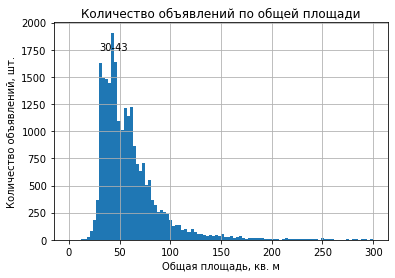

In [53]:
data['total_area'].hist(range = (0,300),bins=100)
plt.title("Количество объявлений по общей площади")
plt.xlabel("Общая площадь, кв. м")
plt.ylabel("Количество объявлений, шт.")
plt.annotate("30-43", xy=(30, 1750))

Наиболее часто встречаются квартиры с площадью от 30 до 43 кв. метров.
Реже встречаются квартиры с площадью менее 20 кв. м и более 200 кв. метров.

Построим гистограмму по показателю цены:


Text(0, 0.5, 'Количество объявлений, шт.')

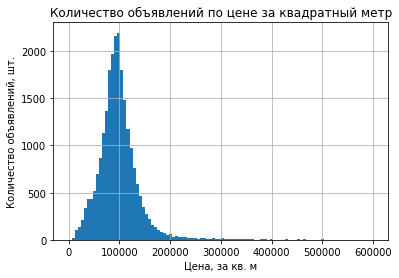

In [54]:
data['price'].hist(range = (0,600000),bins=100) 
plt.title("Количество объявлений по цене за квадратный метр")
plt.xlabel("Цена, за кв. м")
plt.ylabel("Количество объявлений, шт.")


Большая часть квартир продается со стоимостью 100 000 руб. за кв. м.
Стоимость до 20 000 руб. и выше 300 000 руб. являются редкими значениями.

Построим гистограмму по показателю количества комнат:

Text(1, 8000, '1')

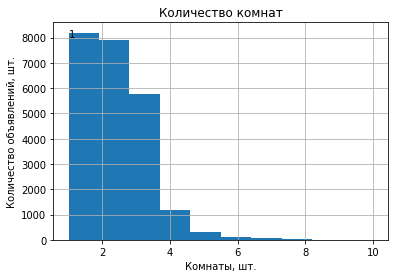

In [55]:
data['rooms'].hist(range = (1,10),) 
plt.title("Количество комнат")
plt.xlabel("Комнаты, шт.")
plt.ylabel("Количество объявлений, шт.")
plt.annotate("1", xy=(1, 8000))

Больше всего объявлений по продаже однокомнатных квартир.
Шумом по количеству комнат можно назвать все позиции с количество комнат более 8.

Построим гистограмму по высоте потолков.

Text(0, 0.5, 'Количество объявлений, шт.')

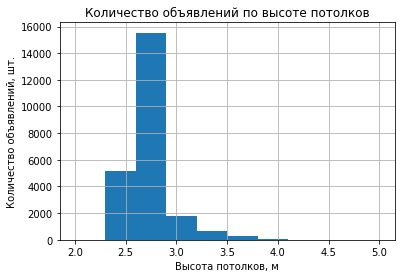

In [56]:
data['ceiling_height'].hist(range = (2,5))
plt.title("Количество объявлений по высоте потолков")
plt.xlabel("Высота потолков, м")
plt.ylabel("Количество объявлений, шт.")


Самая распространенная высота потолков 2,75 метров. Высота потолков выше 3,75 метров встречается крайне редко.

Построим график по количеству дней на продажу квартиры

Text(0, 0.5, 'Количество объявлений, шт.')

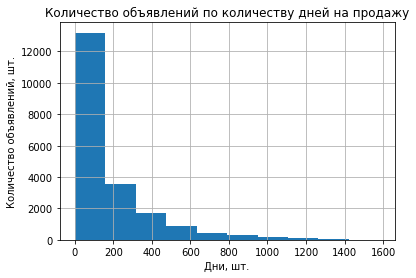

In [57]:
data['days_exposition'].hist()
plt.title("Количество объявлений по количеству дней на продажу")
plt.xlabel("Дни, шт.")
plt.ylabel("Количество объявлений, шт.")


Выведем среднее время на продажу квартиры и значение медианы

In [58]:
print(data['days_exposition'].describe())

count   20,388.00
mean       180.76
std        219.76
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт.')

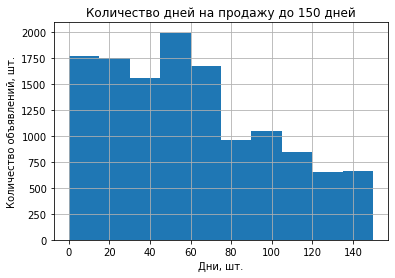

In [59]:
data['days_exposition'].hist(range = (0,150))
plt.title("Количество дней на продажу до 150 дней")
plt.xlabel("Дни, шт.")
plt.ylabel("Количество объявлений, шт.")


<div class="alert alert-info"> <b>Комментарий студента:</b> Можно предположить,что на продажу самых ходовых квартир уходит около 70 дней. На продажу уникальных квартир или квартир по повышенной стоимости потребуется дольше времени?  </div>

Если квартиру удалось продать менее чем за 2 месяца и 10 дней, это является быстрой продажей.
Есть и квартиры на продажу которых потребуется более года и 2 лет.
Крайне редко потребуется более 1100 дней на продажу квартиры.


Уберем редкие значения из таблицы, которые были выявлены при построении диаграмм.

In [60]:
data_new = data.query('total_area>20 & total_area<200 & price>20000 & price<300000 & rooms<8 & days_exposition<1100')


Проверим как меняется стоимость в зависимости от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.


In [61]:
data_new_pivot = data_new.pivot_table(index='last_price', values=['price','total_area','rooms','city_centers_nearest','ceiling_height'], aggfunc='mean')
print(data_new_pivot.corr())


                      ceiling_height  city_centers_nearest  price  rooms  \
ceiling_height                  1.00                 -0.05   0.39   0.33   
city_centers_nearest           -0.05                  1.00   0.04  -0.06   
price                           0.39                  0.04   1.00   0.30   
rooms                           0.33                 -0.06   0.30   1.00   
total_area                      0.45                 -0.06   0.50   0.85   

                      total_area  
ceiling_height              0.45  
city_centers_nearest       -0.06  
price                       0.50  
rooms                       0.85  
total_area                  1.00  


Общая стоимость квартиры зависит от цены за квадратный метр, количества комнат и общей площади.
На стоимость за квадратный метр в обратной пропорциональности влияют показатели удаленности от центра, чем ближе к центру, тем дороже стоимость квадратного метра.
В прямой пропорциональности влияет показатель общей площади,количества комнат и высоты потолков,чем больше площадь квартиры,больше количество комнат и выше потолки, тем дороже стоимость.



Для определения зависимости стоимости квартиры от этажа сгруппируем таблицу по категории этаж.
Определим долю каждой категории в общей сумме по показателю цена за квадратный метр.
Определим долю каждой категории во всей таблице.
Опеределим зависимость между показателем цены за квадратный метр и категорией по этажности.

In [62]:
data_new_groupby_category_floor = data_new.groupby('category_floor').agg({'price':'sum','category_floor':'count'})
data_new_groupby_category_floor['price_percent'] = data_new_groupby_category_floor['price']/data_new['price'].sum()*100
data_new_groupby_category_floor['category_floor'] = data_new_groupby_category_floor['category_floor']/data_new['category_floor'].count()*100
data_new_groupby_category_floor['bound'] = data_new_groupby_category_floor['price_percent']/data_new_groupby_category_floor['category_floor']
print(data_new_groupby_category_floor)


                          price  category_floor  price_percent  bound
category_floor                                                       
другой         1,467,647,930.29           74.49          77.38   1.04
первый           190,572,595.85           11.97          10.05   0.84
последний        238,371,918.75           13.54          12.57   0.93


Text(0.5, 0, 'Категория этажа')

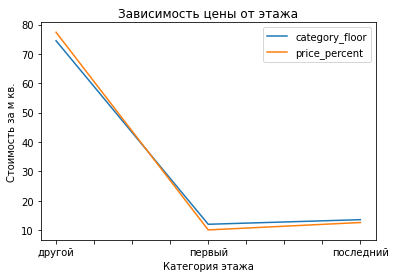

In [63]:
data_new_groupby_category_floor[['category_floor','price_percent']].plot()
plt.title("Зависимость цены от этажа")
plt.ylabel("Стоимость за м кв.")
plt.xlabel("Категория этажа")


На основании вышеуказанной таблицы можно сделать вывод,что стоимость за квадратный метр зависит от этажа на которм расположена квартира.
На первом этаже стоимость за квадратный метр будет значительно ниже чем на последнем.
А стоимость квартиры за квадратный метр на последнем этаже будет дешевле,чем на любом другом этаже (отличном от первого).

                  category_month  category_weekday  category_year  price
category_month              1.00              0.05          -0.30  -0.02
category_weekday            0.05              1.00          -0.07  -0.11
category_year              -0.30             -0.07           1.00   0.02
price                      -0.02             -0.11           0.02   1.00
                          price  category_weekday  price_percent  bound
category_weekday                                                       
0                283,057,904.33             14.94          14.92   1.00
1                335,019,225.33             17.67          17.66   1.00
2                313,529,884.98             16.53          16.53   1.00
3                349,672,535.56             18.34          18.44   1.01
4                327,447,044.84             17.30          17.27   1.00
5                153,288,591.40              8.08           8.08   1.00
6                134,577,258.44              7.14          

Text(0.5, 0, 'День недели')

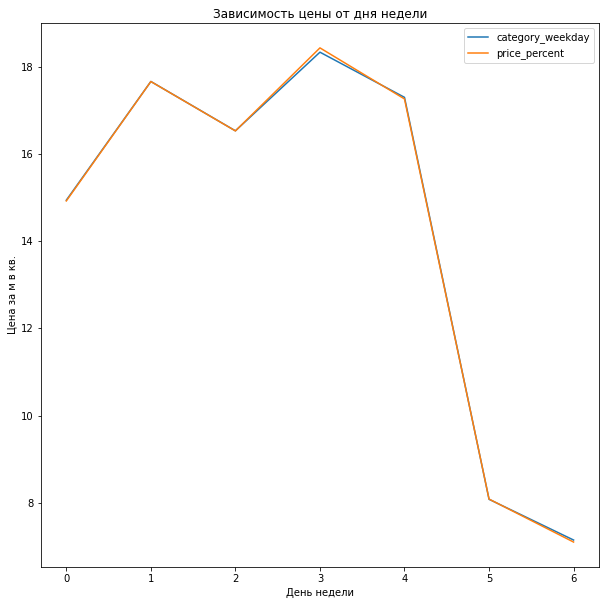

In [64]:
data_new_pivot = data_new.pivot_table(index='locality_name', values=['price','category_weekday','category_month','category_year'], aggfunc='mean')
print(data_new_pivot.corr())

data_new_groupby_category_weekday = data_new.groupby('category_weekday').agg({'price':'sum','category_weekday':'count'})
data_new_groupby_category_weekday['price_percent'] = data_new_groupby_category_weekday['price']/data_new['price'].sum()*100
data_new_groupby_category_weekday['category_weekday'] = data_new_groupby_category_weekday['category_weekday']/data_new['category_weekday'].count()*100
data_new_groupby_category_weekday['bound'] = data_new_groupby_category_weekday['price_percent']/data_new_groupby_category_weekday['category_weekday']
print(data_new_groupby_category_weekday)

data_new_groupby_category_weekday[['category_weekday','price_percent']].plot(figsize=(10,10))
plt.title("Зависимость цены от дня недели")
plt.ylabel("Цена за м в кв.")
plt.xlabel("День недели")


Дени недели не оказывают сильного влияния на стоимость квартир, но можно наблюдать незначительное увеличение стоимости по четвергам.

                        price  category_month  price_percent  bound
category_month                                                     
1              119,491,535.63            6.27           6.30   1.00
2              211,337,124.61           11.19          11.14   1.00
3              181,774,608.75            9.62           9.58   1.00
4              139,880,308.05            7.42           7.38   0.99
5              106,674,349.76            5.63           5.62   1.00
6              152,546,059.61            8.17           8.04   0.98
7              144,769,433.38            7.64           7.63   1.00
8              151,774,583.23            7.92           8.00   1.01
9              174,277,180.94            9.01           9.19   1.02
10             180,225,957.63            9.52           9.50   1.00
11             202,284,800.87           10.58          10.67   1.01
12             131,556,502.42            7.05           6.94   0.98


Text(0.5, 0, 'Год')

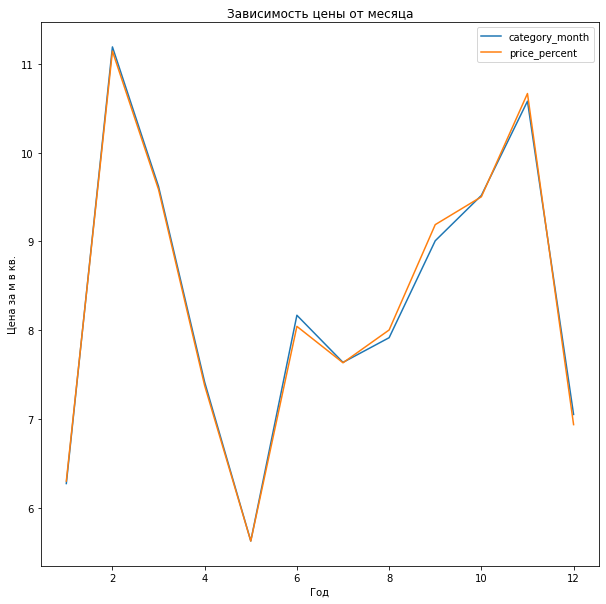

In [65]:
data_new_groupby_category_month = data_new.groupby('category_month').agg({'price':'sum','category_month':'count'})
data_new_groupby_category_month['price_percent'] = data_new_groupby_category_month['price']/data_new['price'].sum()*100
data_new_groupby_category_month['category_month'] = data_new_groupby_category_month['category_month']/data_new['category_month'].count()*100
data_new_groupby_category_month['bound'] = data_new_groupby_category_month['price_percent']/data_new_groupby_category_month['category_month']
print(data_new_groupby_category_month)

data_new_groupby_category_month[['category_month','price_percent']].plot(figsize=(10,10))
plt.title("Зависимость цены от месяца")
plt.ylabel("Цена за м в кв.")
plt.xlabel("Год")



При изучении взаимосвязи между месяцем продажи и ценой можно наблюдать снижение стоимости квартир в период с мая по июль, к сентябрю стоимость квартир несколько увеличивается и достигает своего пика.

                       price  category_year  price_percent  bound
category_year                                                    
2014            8,465,610.89           0.41           0.45   1.09
2015           89,209,723.43           4.73           4.70   0.99
2016          246,300,087.49          13.15          12.99   0.99
2017          730,792,583.23          39.00          38.53   0.99
2018          710,664,323.54          37.35          37.47   1.00
2019          111,160,116.30           5.36           5.86   1.09


Text(0.5, 0, 'Год')

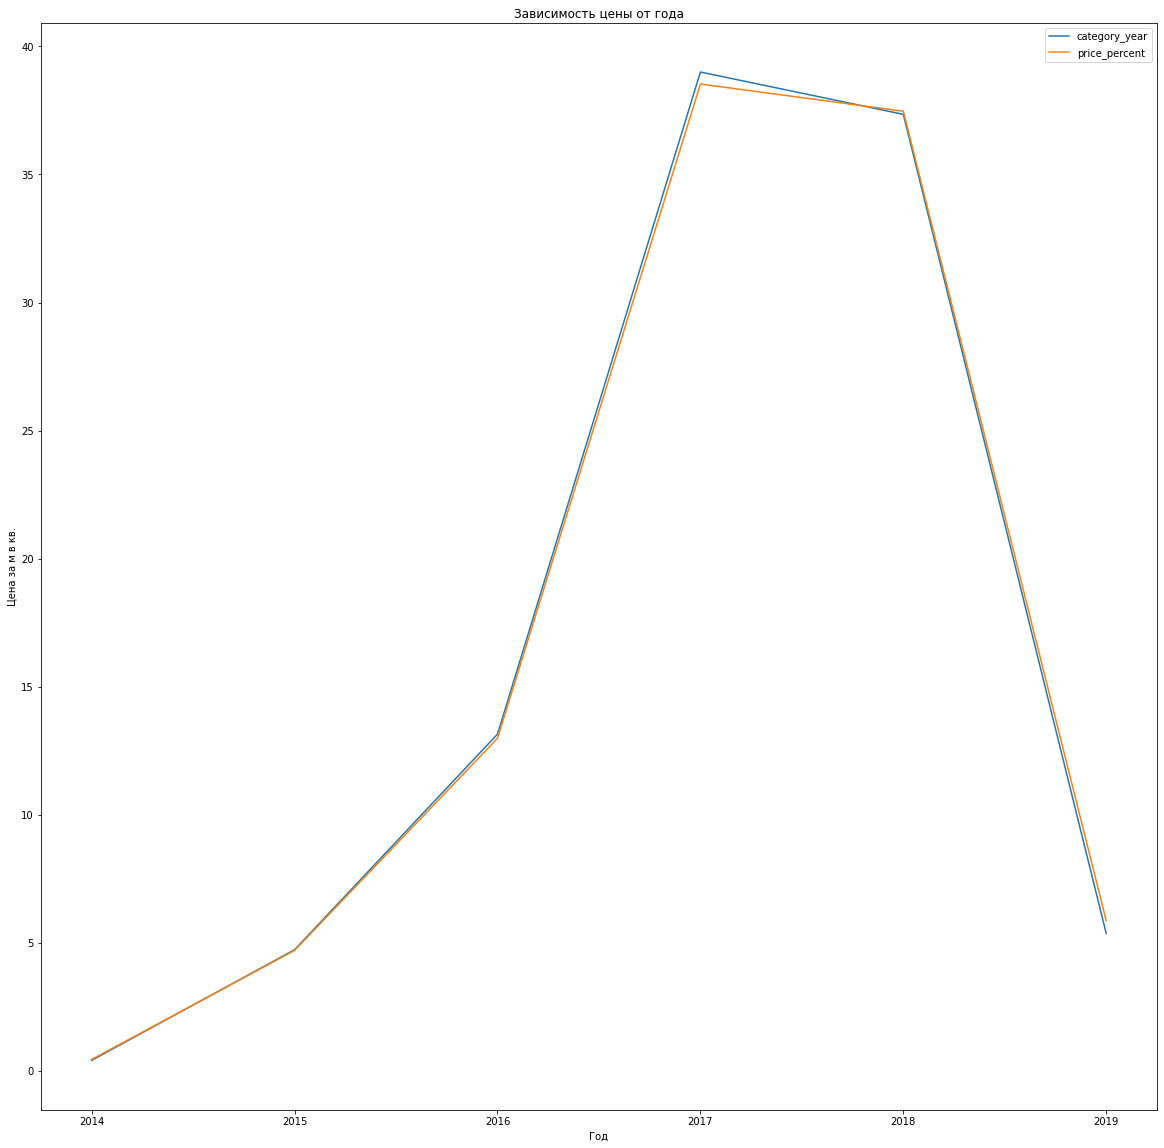

In [66]:
data_new_groupby_category_year = data_new.groupby('category_year').agg({'price':'sum','category_year':'count'})
data_new_groupby_category_year['price_percent'] = data_new_groupby_category_year['price']/data_new['price'].sum()*100
data_new_groupby_category_year['category_year'] = data_new_groupby_category_year['category_year']/data_new['category_year'].count()*100
data_new_groupby_category_year['bound'] = data_new_groupby_category_year['price_percent']/data_new_groupby_category_year['category_year']
print(data_new_groupby_category_year)

data_new_groupby_category_year[['category_year','price_percent']].plot(figsize=(20,20))
plt.title("Зависимость цены от года")
plt.ylabel("Цена за м в кв.")
plt.xlabel("Год")


При изучении корреляции между днем недели, месяцем и годом сильная взаимосвязь не прослеживается между показателями.

Изучив отдельно взаимосвязь года продажи и цены за квадратный метр, можно сделать вывод,что стоимость квартир увеличилась в 2014 и в 2019 году на 9 процентов соответственно. Незначительное понижение стоимости на 1% можно наблюдать с 2015 - 2017 год.

In [67]:
data_new_top_10 = data_new.pivot_table(index='locality_name', values='price', aggfunc={'count','mean'})
data_new_top_10 = data_new_top_10.sort_values(by='count',ascending=False).head(10)
display(data_new_top_10.sort_values(by='mean'))

,count,mean
locality_name,,
выборг,207,"57,269.77"
всеволожск,335,"66,919.96"
гатчина,265,"68,548.24"
колпино,306,"74,736.74"
поселок шушары,405,"77,799.86"
поселок мурино,543,"85,718.21"
поселок парголово,300,"89,591.39"
деревня кудрово,297,"92,462.61"
пушкин,298,"102,073.58"


Самые дешевые квартиры продаются в районе Выборга, Всеволжска и Гатчины.
Самое дорогое жилье в Санкт-Петербурге, Пушкине,деревне Кудрово и поселке Парголово.

Выясним какие квартиры относятся к центру.
Для этого отразим удаленность от центра в км и округлим значения в столбце city_centers_nearest.

In [68]:

data_new['city_centers_nearest_round'] = data_new['city_centers_nearest']/1000
data_new['city_centers_nearest_round'] = data_new['city_centers_nearest_round'].astype('int32')

print(data_new['city_centers_nearest_round'])



1        18
2        13
4         8
5         0
6        19
         ..
23691     4
23692     0
23693    34
23695     0
23697    10
Name: city_centers_nearest_round, Length: 19784, dtype: int32


/tmp/ipykernel_98/2055352548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['city_centers_nearest_round'] = data_new['city_centers_nearest']/1000
/tmp/ipykernel_98/2055352548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['city_centers_nearest_round'] = data_new['city_centers_nearest_round'].astype('int32')


Посчитаем среднюю цену для каждого километра и построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

Text(0.5, 0, 'Удаленность от центра')

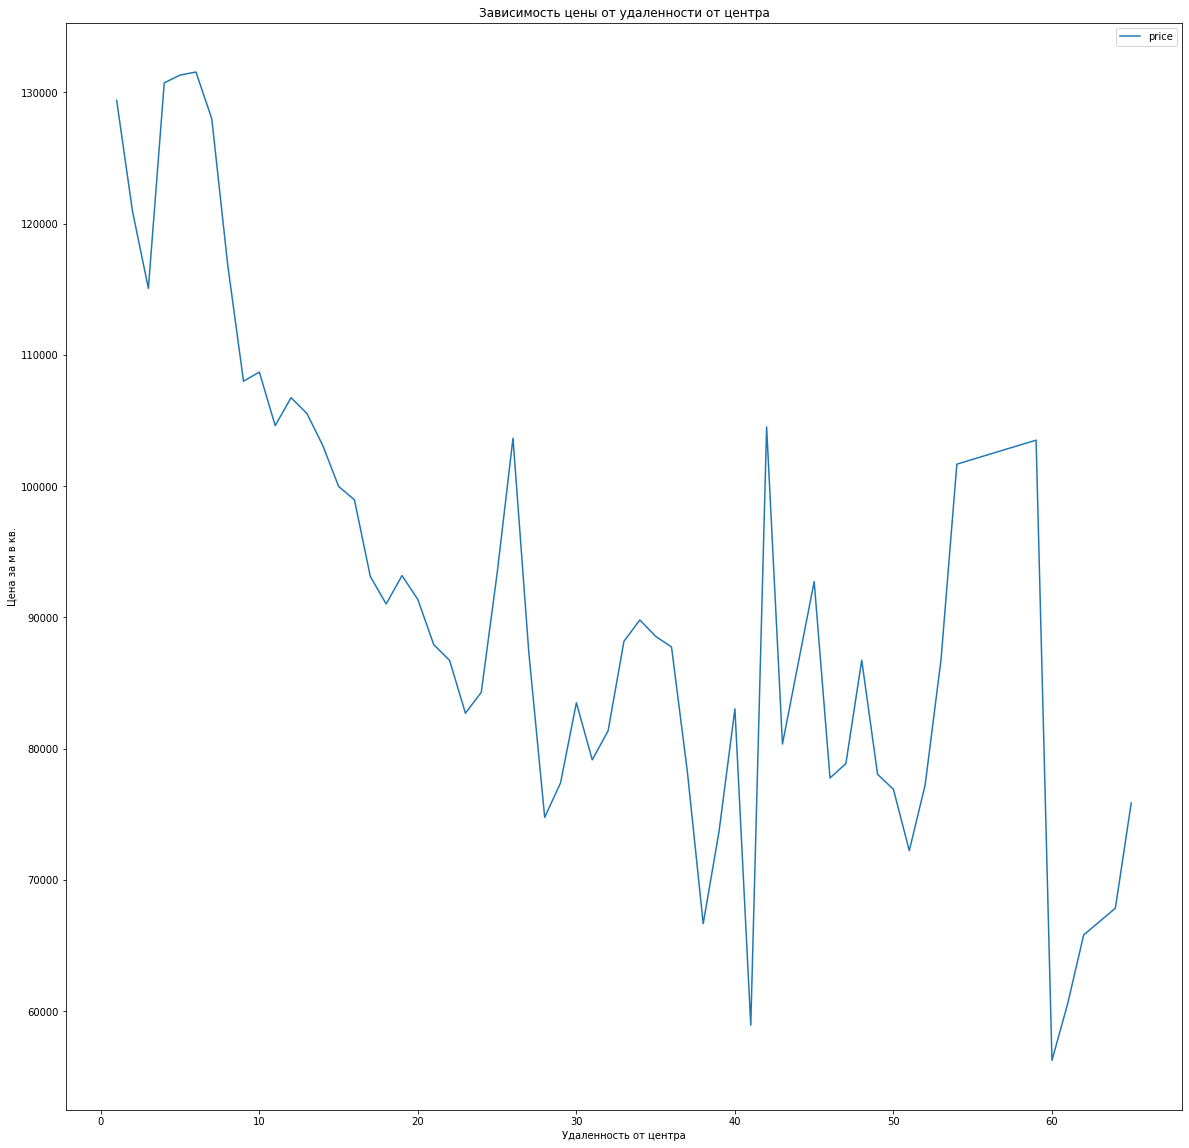

In [69]:
city_centers = data_new.query('city_centers_nearest_round>0').pivot_table(index='city_centers_nearest_round', values='price', aggfunc='mean')

city_centers.plot(figsize=(20,20))
plt.title("Зависимость цены от удаленности от центра")
plt.ylabel("Цена за м в кв.")
plt.xlabel("Удаленность от центра")


Исходя из построенного графика можно сделать вывод,что центром считается удаленность не более 10 км.
Стоимость квадратного метра при удаленности до 10 км идет на увеличение,далее можно заметить снижение стоимости.

Проанализируем как цена квартир в центре зависит от количества комнат и общей площади

In [70]:
data_new_pivot = data_new.query('city_centers_nearest_round>0 | city_centers_nearest_round<10').pivot_table(index='last_price', values=['price','total_area','rooms','city_centers_nearest_round','ceiling_height'], aggfunc='mean')
print(data_new_pivot.corr())

                            ceiling_height  city_centers_nearest_round  price  \
ceiling_height                        1.00                       -0.06   0.39   
city_centers_nearest_round           -0.06                        1.00   0.03   
price                                 0.39                        0.03   1.00   
rooms                                 0.33                       -0.07   0.30   
total_area                            0.45                       -0.07   0.50   

                            rooms  total_area  
ceiling_height               0.33        0.45  
city_centers_nearest_round  -0.07       -0.07  
price                        0.30        0.50  
rooms                        1.00        0.85  
total_area                   0.85        1.00  


Проведем анализ как меняется стоимость квартиры исходя из того на каком этаже расположена квартира.

                          price  category_floor  price_percent  bound
category_floor                                                       
другой         1,467,647,930.29           74.49          77.38   1.04
первый           190,572,595.85           11.97          10.05   0.84
последний        238,371,918.75           13.54          12.57   0.93


Text(0.5, 0, 'Категория этажа')

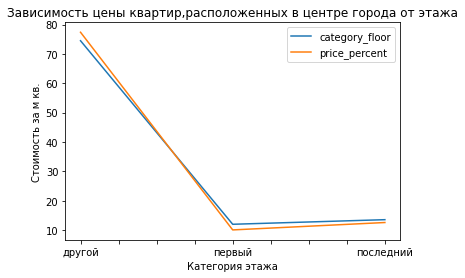

In [71]:
data_new_groupby_category_floor = data_new.query('city_centers_nearest_round>0 | city_centers_nearest_round<20').groupby('category_floor').agg({'price':'sum','category_floor':'count'})
data_new_groupby_category_floor['price_percent'] = data_new_groupby_category_floor['price']/data_new.query('city_centers_nearest_round>0 | city_centers_nearest_round<20')['price'].sum()*100
data_new_groupby_category_floor['category_floor'] = data_new_groupby_category_floor['category_floor']/data_new.query('city_centers_nearest_round>0 | city_centers_nearest_round<20')['category_floor'].count()*100
data_new_groupby_category_floor['bound'] = data_new_groupby_category_floor['price_percent']/data_new_groupby_category_floor['category_floor']
print(data_new_groupby_category_floor)

data_new_groupby_category_floor[['category_floor','price_percent']].plot()
plt.title("Зависимость цены квартир,расположенных в центре города от этажа")
plt.ylabel("Стоимость за м кв.")
plt.xlabel("Категория этажа")

Зависимость от этажа на котором расположена квартира такая же как и у квартир,которые расположены за границами центра Санкт-Петербурга.

Проверим зависимость от дня недели, месяца и года.

In [72]:
data_new_pivot = data_new.query('city_centers_nearest_round>0 | city_centers_nearest_round<20').pivot_table(index='locality_name', values=['price','category_weekday','category_month','category_year'], aggfunc='mean')
print(data_new_pivot.corr())

                  category_month  category_weekday  category_year  price
category_month              1.00              0.05          -0.30  -0.02
category_weekday            0.05              1.00          -0.07  -0.11
category_year              -0.30             -0.07           1.00   0.02
price                      -0.02             -0.11           0.02   1.00


                          price  category_weekday  price_percent  bound
category_weekday                                                       
0                283,057,904.33             14.94          14.92   1.00
1                335,019,225.33             17.67          17.66   1.00
2                313,529,884.98             16.53          16.53   1.00
3                349,672,535.56             18.34          18.44   1.01
4                327,447,044.84             17.30          17.27   1.00
5                153,288,591.40              8.08           8.08   1.00
6                134,577,258.44              7.14           7.10   0.99


Text(0.5, 0, 'День недели')

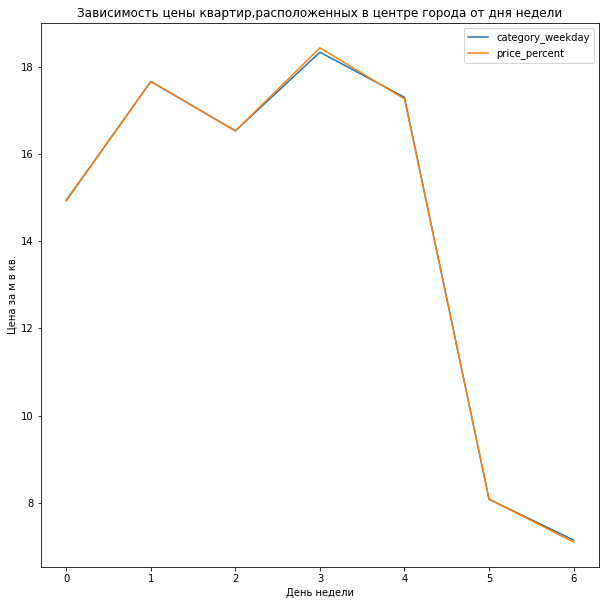

In [73]:
data_new_groupby_category_weekday = data_new.groupby('category_weekday').agg({'price':'sum','category_weekday':'count'})
data_new_groupby_category_weekday['price_percent'] = data_new_groupby_category_weekday['price']/data_new['price'].sum()*100
data_new_groupby_category_weekday['category_weekday'] = data_new_groupby_category_weekday['category_weekday']/data_new['category_weekday'].count()*100
data_new_groupby_category_weekday['bound'] = data_new_groupby_category_weekday['price_percent']/data_new_groupby_category_weekday['category_weekday']
print(data_new_groupby_category_weekday)

data_new_groupby_category_weekday[['category_weekday','price_percent']].plot(figsize=(10,10))
plt.title("Зависимость цены квартир,расположенных в центре города от дня недели")
plt.ylabel("Цена за м в кв.")
plt.xlabel("День недели")

                        price  category_month  price_percent  bound
category_month                                                     
1              119,491,535.63            6.27           6.30   1.00
2              211,337,124.61           11.19          11.14   1.00
3              181,774,608.75            9.62           9.58   1.00
4              139,880,308.05            7.42           7.38   0.99
5              106,674,349.76            5.63           5.62   1.00
6              152,546,059.61            8.17           8.04   0.98
7              144,769,433.38            7.64           7.63   1.00
8              151,774,583.23            7.92           8.00   1.01
9              174,277,180.94            9.01           9.19   1.02
10             180,225,957.63            9.52           9.50   1.00
11             202,284,800.87           10.58          10.67   1.01
12             131,556,502.42            7.05           6.94   0.98


Text(0.5, 0, 'Год')

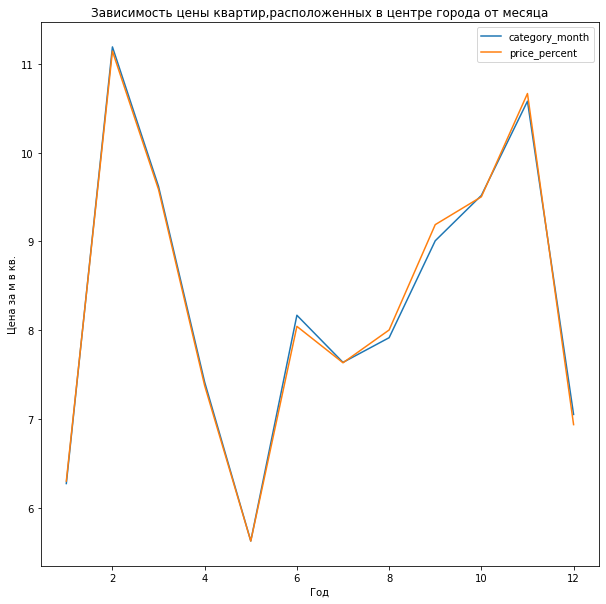

In [74]:
data_new_groupby_category_month = data_new.groupby('category_month').agg({'price':'sum','category_month':'count'})
data_new_groupby_category_month['price_percent'] = data_new_groupby_category_month['price']/data_new['price'].sum()*100
data_new_groupby_category_month['category_month'] = data_new_groupby_category_month['category_month']/data_new['category_month'].count()*100
data_new_groupby_category_month['bound'] = data_new_groupby_category_month['price_percent']/data_new_groupby_category_month['category_month']
print(data_new_groupby_category_month)

data_new_groupby_category_month[['category_month','price_percent']].plot(figsize=(10,10))
plt.title("Зависимость цены квартир,расположенных в центре города от месяца")
plt.ylabel("Цена за м в кв.")
plt.xlabel("Год")

                       price  category_year  price_percent  bound
category_year                                                    
2014            8,465,610.89           0.41           0.45   1.09
2015           89,209,723.43           4.73           4.70   0.99
2016          246,300,087.49          13.15          12.99   0.99
2017          730,792,583.23          39.00          38.53   0.99
2018          710,664,323.54          37.35          37.47   1.00
2019          111,160,116.30           5.36           5.86   1.09


Text(0.5, 0, 'Год')

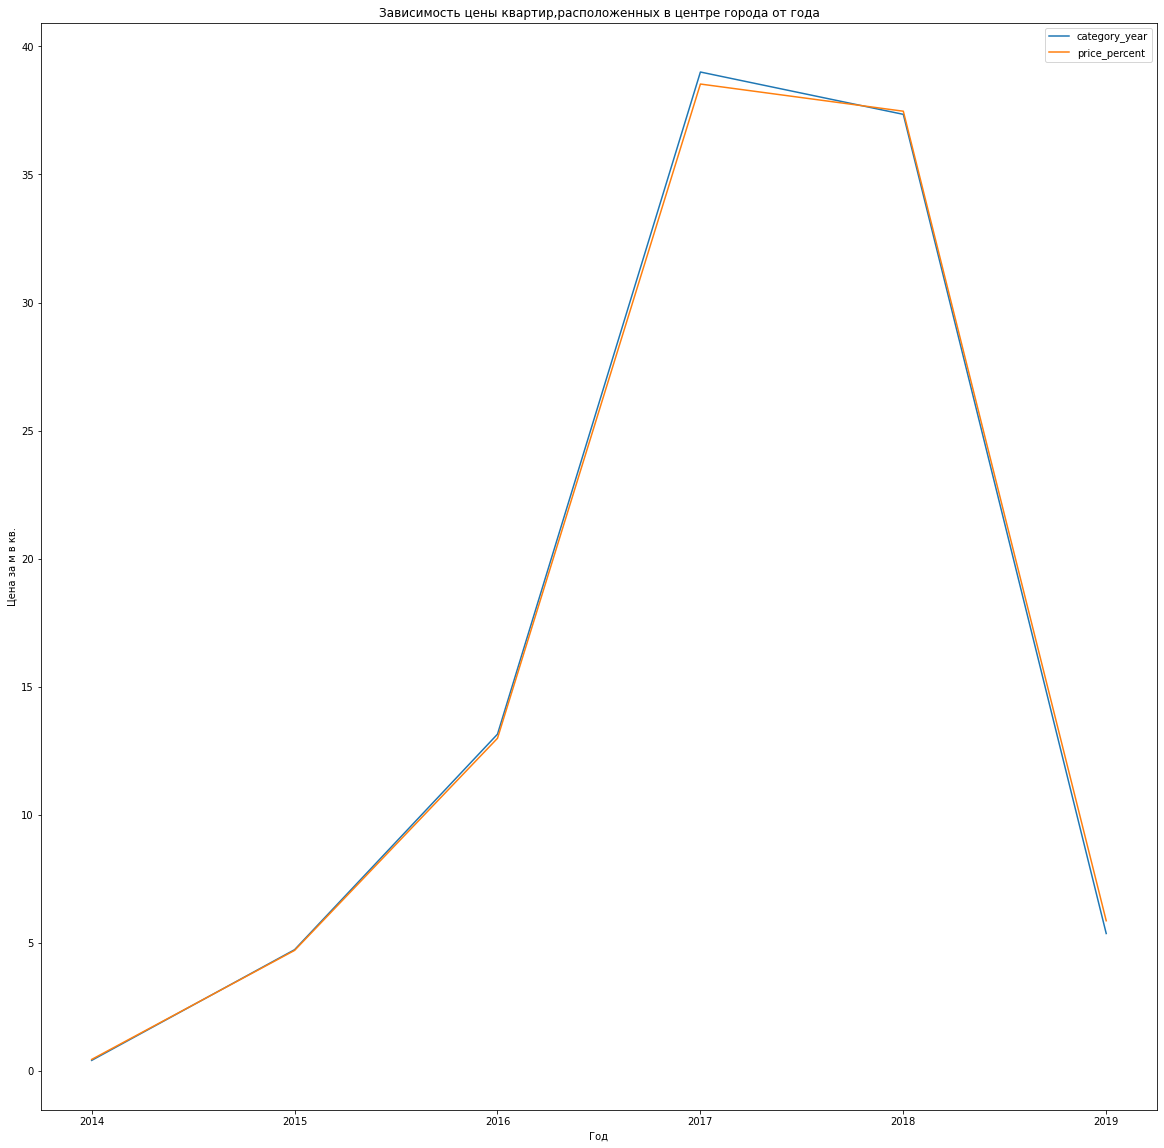

In [75]:
data_new_groupby_category_year = data_new.groupby('category_year').agg({'price':'sum','category_year':'count'})
data_new_groupby_category_year['price_percent'] = data_new_groupby_category_year['price']/data_new['price'].sum()*100
data_new_groupby_category_year['category_year'] = data_new_groupby_category_year['category_year']/data_new['category_year'].count()*100
data_new_groupby_category_year['bound'] = data_new_groupby_category_year['price_percent']/data_new_groupby_category_year['category_year']
print(data_new_groupby_category_year)

data_new_groupby_category_year[['category_year','price_percent']].plot(figsize=(20,20))
plt.title("Зависимость цены квартир,расположенных в центре города от года")
plt.ylabel("Цена за м в кв.")
plt.xlabel("Год")

Изучим высоту потолков для квартир, расположенных в центре и вне центра.

In [76]:
data_new.query('city_centers_nearest_round>0 | city_centers_nearest_round<20')['ceiling_height'].mean()


2.7054632

In [77]:
data_new.query('city_centers_nearest_round>20')['ceiling_height'].mean()

2.6502547

**Вывод**

В результате исследования квартир, наиболее чаще встречаются объявления о продаже квартир с:
- с площадью от 30 до 43 кв. метров;
- со стоимостью 100 000 руб. за кв. м.;
- однокомнатные;
- высота потолков 2,75 м;
- ориентировочный срок продажи от 2-5 месяцев

Исходя из проведенных исследований можно сделать вывод,что все параметры (кроме расположения от центра) влияют на стоимость квартир расположенных в центре и вне центра одинаково.

Средняя высота потолков в квартирах, расположенных в центре чуть выше,чем у квартир за его пределами.


## Общий вывод
<a id="conclusion_id"></a>

В результате исследования объявлений о продаже квартир было изучено влияние на стоимость квартир таких параметров как:

- площади;
- числа комант;
- удаленности от центра;
- этажа;
- даты размещения;
- высота потолков.

Стоимость квартиры зависит от площади квартиры, высоты потолков, числа комнат.
Стоимость квартир,расположенных на 1 этаже на 15% дешевле остальных квартир, квартиры,расположенные на последнем этаже на 8% дешевле квартир на этажах отличных от 1.

Квартиры,расположенные в 20 км от центра продаются дороже остальных квартир, стоимость за квадратный метр от 75 тыс. руб. и достигает 150 тыс. руб. за квадратный метр.
Стоимость квартир далее 20 км как правило менее 100 тыс. руб. за кв м.

Топ 10 городов о продаже квартир расположены в таблице ниже.

In [78]:
display(data_new_top_10.sort_values(by='mean'))

,count,mean
locality_name,,
выборг,207,"57,269.77"
всеволожск,335,"66,919.96"
гатчина,265,"68,548.24"
колпино,306,"74,736.74"
поселок шушары,405,"77,799.86"
поселок мурино,543,"85,718.21"
поселок парголово,300,"89,591.39"
деревня кудрово,297,"92,462.61"
пушкин,298,"102,073.58"


Самое большое количество объявлений о продаже квартир в Санкт-Петербурге с самой высокой стоимостью жилья за квадратный метр.

Исходя из даты размещения объявления можно сделать вывод,что на стоимость жилья не влияет день недели и месяц размещения объявления. 
Изучив отдельно взаимосвязь года продажи и цены за квадратный метр, можно сделать вывод,что стоимость квартир увеличилась в 2014 и в 2019 году на 15 и 8 процентов соответственно.
